In [ ]:
# importing required libaries
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Question 1.

Your task is to clean and transform the dataset to prepare it for analysis.

In [ ]:
registered_users = pd.read_csv('Assignment/RegisteredUsers.csv')
registered_users.head()

,User ID,Password,Country,Membership Status,Revenue,User Status
0,David-428,sTUk8cA2,USA,unpaid,10.0,LOV29
1,Vicki-305,375fsA6Q,UK,trial,NaN,NON274
2,Juan-481,syY5XETJ,New Zealand,trial,NaN,MAD43
3,Michael-273,9UhPWXK3,USA,unpaid,50.0,LOV167
4,Marie-274,Js9AnphP,New Zealand,trial,NaN,LOV94


In [ ]:
registered_users['Password'] = registered_users['Password'].str.strip() # Remove legacy spaces from passwords
registered_users.drop_duplicates(inplace=True) # Drop duplicates

# Assume data updating errors refer to missing values, so I decided to drop rows with missing values
registered_users.dropna(inplace=True)

registered_users.head()

,User ID,Password,Country,Membership Status,Revenue,User Status
0,David-428,sTUk8cA2,USA,unpaid,10.0,LOV29
3,Michael-273,9UhPWXK3,USA,unpaid,50.0,LOV167
5,Kevin-482,zj5FDUsK,Ireland,unpaid,30.0,LOV127
6,Zachary-189,fHqAW3Nw,UK,unpaid,40.0,LOV79
8,Randi-129,4pGrtfdU,New Zealand,paid,40.0,LOV161


# Checking
1. No missing values in registered_users dataframe.
2. The data is in the right data-type.

The data is now ready for analysis

# Question 2

Use the Donations.csv dataset, which contains information about donations made onto a charity website on a particular day. Your task is to use this data to infer information about all days.

a)	Calculate a 95% confidence interval for the mean money donated in donations.	[4 marks]

b)	Determine the proportion of website visits that would last longer than 400 seconds.		[2 marks]


In [ ]:
donations = pd.read_csv('Assignment/Donations.csv')
donations.head()

,Donation Receipt Number,Donation Amount,Donation Day,Donor's Gender,Donor's Job Type,Time Spent on Website (Seconds)
0,7930,243,Wednesday,Female,Unemployed,104
1,3081,116,Friday,Male,Tradesperson,62
2,2646,153,Thursday,Female,Academic,541
3,9823,24,Tuesday,Male,IT/Programming,669
4,7874,239,Friday,Female,Administrator,500


In [ ]:
# Calculate sample mean and standard deviation
mean_donation = donations['Donation Amount'].mean()
std_dev_donation = donations['Donation Amount'].std(ddof=1)  # ddof=1 for sample standard deviation

n = len(donations) # Calculate the sample size

# Calculate the Z-score for a 95% confidence interval
z_score = stats.norm.ppf(0.975)  # 95% confidence level, two-tailed

margin_of_error = z_score * (std_dev_donation / np.sqrt(n)) # Calculate the margin of error

confidence_interval = (mean_donation - margin_of_error, mean_donation + margin_of_error) # Calculate the confidence interval

print(f"a) 95% Confidence Interval for the mean money donated in donations falls within range of: {confidence_interval[0]} and {confidence_interval[1]}.")

a) 95% Confidence Interval for the mean money donated in donations falls within range of: 137.27530743650894 and 173.87763373996162.


In [ ]:
# Calculate proportion of visits lasting longer than 400 seconds
proportion_longer_than_400 = (donations['Time Spent on Website (Seconds)'] > 400).mean()

print(f"b) Proportion of website visits lasting longer than 400 seconds: {proportion_longer_than_400}.")

b) Proportion of website visits lasting longer than 400 seconds: 0.5647058823529412.


# Question 3

Use the WorkplaceIncidents.csv dataset, which contains information about events where employees were harmed (or nearly harmed) at work in a company.

You work at this company, and a senior colleague of yours claims that “these workplace incidents are costing us €2000 on average!”. (You ask him “Do the misses, that we still have to fill out, count?”, and he responds: “Obviously not”.) You decide to fact-check his claim.

Carry out a relevant hypothesis test (include all steps), to the 5% level of significance, for this scenario.	[6 marks]

(Your hypothesis should include a conclusion, which should be written in words reflecting the scenario.)


In [ ]:
workplace_incidents = pd.read_csv('Assignment/WorkplaceIncidents.csv')
workplace_incidents.head()

,Gender,Incident Type,Report Type,Incident Cost,Date
0,Male,Burn,Near Miss,NaN,"Tue, January 22, 2008"
1,Male,Vehicle,Lost Time,3367.0,"Thu, January 31, 2008"
2,Male,Cut,Near Miss,NaN,"Wed, May 28, 2008"
3,Female,Falling Object,Near Miss,NaN,"Fri, September 17, 2010"
4,Male,Lifting,Near Miss,NaN,"Mon, January 10, 2011"


In [ ]:
average_cost = workplace_incidents['Incident Cost'].mean() # Calculate the average cost of workplace incidents

# Perform the hypothesis test
# Null hypothesis: The average cost of workplace incidents is €2000.
# Alternative hypothesis: The average cost of workplace incidents is not €2000.
alpha = 0.05
t_statistic, p_value = stats.ttest_1samp(workplace_incidents['Incident Cost'].dropna(), 2000, nan_policy='omit')

print("Average Cost of Workplace Incidents:", average_cost)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Make a decision
if p_value < alpha:
    print("\nReject the null hypothesis. The average cost of workplace incidents is not €2000.")
else:
    print("\nFail to reject the null hypothesis. The average cost of workplace incidents is €2000.")

Average Cost of Workplace Incidents: 1897.9397905759163
t-statistic: -1.2557362553224458
p-value: 0.20998114422160186

Fail to reject the null hypothesis. The average cost of workplace incidents is €2000.


### Findings

Based on the hypothesis test results:

Since the p-value (0.20998) is greater than the significance level (α = 0.05), we fail to reject the null hypothesis. Therefore, we do not have enough evidence to conclude that the average cost of workplace incidents is different from €2000.

Conclusion:
Based on the analysis, we cannot reject the claim made by the senior colleague that the average cost of workplace incidents is €2000.

# Question 4

You are a literary researcher, and are going to present your findings on the topic of how literary works are performing compared to how they are published.


In [ ]:
literary_works = pd.read_csv('Assignment/LiteraryWorks.csv')
literary_works.head()

,Author,Literature Type,Genre,Publish Date,Publish Code,Publishing Type,Rating (stars)
0,Larry Weber,Novel,Science Fiction,18/03/1984,137717,Self,5
1,Julia Bartlett,Play,Horror,17/06/1973,989530,Trade,4
2,Brenda Rhodes,Short Story,Science Fiction,25/05/1993,980447,Independent,2
3,Charles Alexander,Novel,Fantasy,18/01/1965,757647,Independent,4
4,Henrietta Herman,Novel,Fantasy,25/07/1971,748646,Trade,1


### Create a bar chart comparing publishing type and average rating

[]

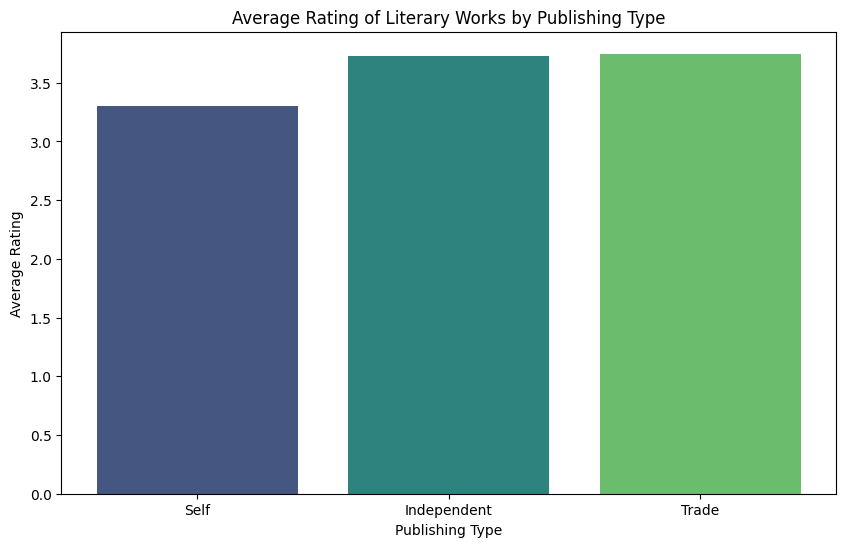

In [ ]:
avg_rating_by_publishing_type = literary_works.groupby('Publishing Type')['Rating (stars)'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_publishing_type.index, y=avg_rating_by_publishing_type.values, palette='viridis')

plt.xlabel('Publishing Type')
plt.ylabel('Average Rating')
plt.title('Average Rating of Literary Works by Publishing Type')
plt.plot()

In [ ]:
avg_rating_by_publishing_type

Publishing Type
Self           3.300000
Independent    3.724832
Trade          3.746622
Name: Rating (stars), dtype: float64

### Findings
Interestingly, there is a marginal difference in the average ratings between works published via traditional trade channels (3.75 stars) and those self-published (3.30 stars), suggesting that the publishing method might have a subtle influence on the reception of literary works.


# Question 5

She wants you to investigate if there is a relationship (and if so, what kind of relationship) between employees’ salaries and how long they have worked at the company.

In [ ]:
employee_details = pd.read_csv('Assignment/EmployeeDetails.csv', encoding='unicode_escape')
employee_details.head()

,Employee Name,Building,Department,Birth Date,Hire Date,Years,Compensation,Job Rating,Benefits
0,"Buchanan, Dennis",WEST,ADC,30759,41069,9,69350.0,5,DMR
1,"Perez, William",WEST,ADC,26832,38823,15,58810.0,1,R
2,"Potter, Dawn",WATSON,ADC,34114,42099,6,96140.0,2,DR
3,"Estes, Mary",WEST,ADC,23760,35942,23,61770.0,4,
4,"Jefferson, Elaine",TAFT,ADC,26139,36498,21,47100.0,3,


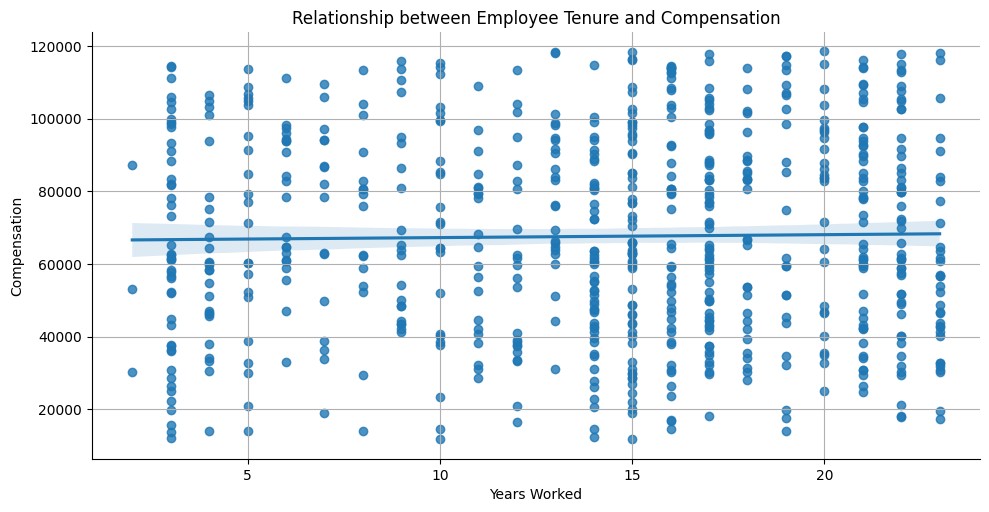

In [ ]:
# Implot to show relationship between features
sns.lmplot(x='Years', y='Compensation', data=employee_details, aspect=2)
plt.title('Relationship between Employee Tenure and Compensation')
plt.xlabel('Years Worked')
plt.ylabel('Compensation')
plt.grid(True)
plt.show()

### Findings
The scatter plot showcases the diversity in compensation among employees with varying years of service. Without asserting any obvious connection between years worked and salary progression.
